In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Loading Datasets

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Datasets/car brand classification train dataset'
valid_path = '/content/drive/MyDrive/Datasets/car brand classification test dataset'

In [14]:
resnet =  ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
#First layers and last layers i have to give my own data set and output *class*

In [15]:
resnet.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [16]:
for layer in resnet.layers:
  layer.trainable=False

In [17]:
# we getting number of our output class
folders = glob('/content/drive/MyDrive/Datasets/car brand classification train dataset/*')

In [18]:
folders

['/content/drive/MyDrive/Datasets/car brand classification train dataset/lamborghini',
 '/content/drive/MyDrive/Datasets/car brand classification train dataset/audi',
 '/content/drive/MyDrive/Datasets/car brand classification train dataset/mercedes']

In [19]:
x = Flatten()(resnet.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)
#creat a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/car brand classification train dataset',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/car brand classification test dataset',
                                             target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [25]:
r = model.fit_generator(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 64s 38s/step - loss: 5.3126 - accuracy: 0.3854 - val_loss: 6.5824 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 20s 15s/step - loss: 4.5930 - accuracy: 0.3750 - val_loss: 6.1480 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 20s 15s/step - loss: 9.4721 - accuracy: 0.3542 - val_loss: 4.0310 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 20s 14s/step - loss: 7.1732 - accuracy: 0.3542 - val_loss: 4.0889 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 20s 14s/step - loss: 4.4607 - accuracy: 0.4167 - val_loss: 2.0362 - val_accuracy: 0.2241
Epoch 6/50
2/2 [==============================] - 20s 14s/step - loss: 1.9166 - accuracy: 0.4062 - val_loss: 5.7769 - val_accuracy: 0.2069
Epoch 7/50
2/2 [==============================] - 20s 14s/step - loss: 3.7096 - accuracy: 0.4479 - val_loss: 6.1375 - val_accuracy: 0.3276
Epoch 8/50
2/2 [===========

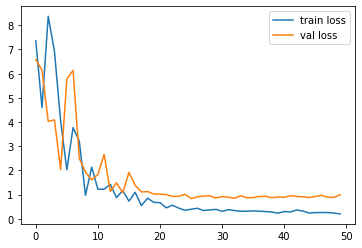

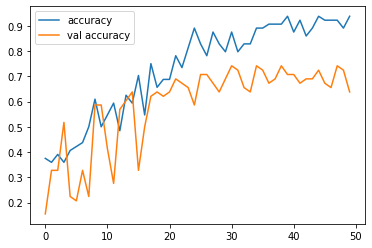

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('train loss vs val loss')

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy vs val accuracy')

In [27]:
from tensorflow.keras.models import load_model
model.save('model.resnet50.h5')

In [28]:
y_pred = model.predict(test_set)

In [29]:
y_pred

array([[4.84672450e-02, 1.17229596e-01, 8.34303141e-01],
       [5.54419123e-03, 9.05081272e-01, 8.93746093e-02],
       [3.93957309e-02, 4.57733124e-02, 9.14830923e-01],
       [7.63916612e-01, 3.69845144e-03, 2.32384935e-01],
       [4.26292513e-03, 1.22366212e-02, 9.83500481e-01],
       [2.11962848e-03, 9.78989065e-01, 1.88913494e-02],
       [5.01807779e-02, 1.64334491e-01, 7.85484731e-01],
       [3.05745974e-02, 1.91088155e-01, 7.78337300e-01],
       [2.14007068e-02, 7.70048946e-02, 9.01594341e-01],
       [1.80481456e-03, 9.51024234e-01, 4.71708700e-02],
       [8.87897968e-01, 2.82550696e-02, 8.38469863e-02],
       [3.31143215e-02, 1.89351354e-04, 9.66696322e-01],
       [2.25057602e-01, 1.47604480e-01, 6.27337873e-01],
       [1.34935349e-01, 9.89114046e-02, 7.66153336e-01],
       [4.79033068e-02, 2.03125983e-01, 7.48970687e-01],
       [8.76970123e-03, 1.12354662e-03, 9.90106761e-01],
       [1.50274637e-03, 5.91799438e-01, 4.06697839e-01],
       [4.31157323e-03, 9.47453

In [30]:
y_pred = np.argmax(y_pred, axis=1) #which ever have higher value that particular index is taken.

In [31]:
y_pred

array([2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2])

In [53]:
img = image.load_img('/content/drive/MyDrive/mer.jpg',target_size=(224,224))

In [54]:
x = image.img_to_array(img)
x

array([[[253., 254., 220.],
        [253., 254., 220.],
        [253., 254., 220.],
        ...,
        [250., 246., 219.],
        [250., 246., 219.],
        [249., 245., 220.]],

       [[253., 254., 222.],
        [253., 254., 222.],
        [251., 255., 222.],
        ...,
        [250., 246., 219.],
        [250., 246., 219.],
        [249., 245., 220.]],

       [[253., 254., 222.],
        [251., 255., 222.],
        [251., 255., 222.],
        ...,
        [249., 245., 218.],
        [249., 245., 218.],
        [248., 244., 217.]],

       ...,

       [[ 81.,  76.,  73.],
        [ 81.,  76.,  73.],
        [ 81.,  76.,  73.],
        ...,
        [ 79.,  73.,  73.],
        [ 77.,  71.,  71.],
        [ 77.,  71.,  71.]],

       [[ 79.,  74.,  71.],
        [ 80.,  75.,  72.],
        [ 80.,  75.,  72.],
        ...,
        [ 80.,  74.,  74.],
        [ 76.,  70.,  70.],
        [ 69.,  63.,  65.]],

       [[ 80.,  75.,  72.],
        [ 80.,  75.,  72.],
        [ 80.,  

In [55]:
x.shape

(224, 224, 3)

In [56]:
x=x/255

In [57]:

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

array([[0.09448361, 0.03566187, 0.8698545 ]], dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data), axis=1)

In [62]:
a==2

array([ True])